<a href="https://www.kaggle.com/code/lhy021/world-most-populated-city?scriptVersionId=179965155" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-most-populated-city-2022-to-2023/World City Populations 2023.csv


## Read data

In [2]:
file = '/kaggle/input/world-most-populated-city-2022-to-2023/World City Populations 2023.csv'
df = pd.read_csv(file)

## Inspect data

In [3]:
df.head()

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank,Unnamed: 7
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1,NaN
1,32941308,32065760,Delhi,India,Asia,0.0273,2,NaN
2,29210808,28516904,Shanghai,China,Asia,0.0243,3,NaN
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4,NaN
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5,NaN


## Format column names

In [4]:
df.columns = df.columns.str.lower()

## ChatGPT Comparison to Pandas-based Analysis

## Question 1: what's the city of rank 100?

ChatGPT:\
The city ranked 100th is Kanpur, located in India.

In [5]:
print('Pandas:')
df.loc[df['rank']==100,['city','rank']]

Pandas:


,city,rank
99,Rome,100


## Question 2: can you describe the dataset? 


ChatGPT:\
The dataset appears to be a collection of population data for various cities around the world in 2022 and 2023. It includes information such as the population in 2022 (`Pop2022`), population in 2023 (`Pop2023`), city name (`City`), country (`Country`), continent (`Continent`), growth rate (`growthRate`), and rank (`rank`). The dataset covers cities from different continents, providing insights into population trends and growth rates across various regions globally.

In [6]:
print('Pandas:')
df.select_dtypes('object').describe().T

Pandas:


,count,unique,top,freq
city,778,774,San Jose,2
country,778,132,China,219
continent,778,6,Asia,466


In [7]:
print('Pandas:')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.select_dtypes('number').describe().T

Pandas:


,count,mean,std,min,25%,50%,75%,max
pop2023,778.00,2658927.29,3700348.51,750097.00,992181.25,1381251.50,2607129.50,37194104.00
pop2022,778.00,2607826.46,3638665.04,723114.00,965789.00,1362342.50,2548158.50,37274000.00
growthrate,778.00,0.02,0.01,-0.03,0.01,0.02,0.03,0.06
rank,778.00,389.50,224.73,1.00,195.25,389.50,583.75,778.00
unnamed: 7,12.00,518.42,153.84,227.00,386.50,603.00,639.75,676.00


## Question 3: the number of rows and columns of this dataset? 


ChatGPT:\
The dataset likely contains numerous rows, each representing a different city, and several columns, each corresponding to a specific demographic, economic, or social indicator. Without specific details, I can't provide an exact count, but datasets of this nature commonly have thousands of rows and dozens to hundreds of columns.

In [8]:
print('Pandas:')
df.shape

Pandas:


(778, 8)

## Question 4: give me top 15 cities? 


ChatGPT:\
Here are the top 15 cities by population in 2023:

1. Tokyo, Japan
2. Delhi, India
3. Shanghai, China
4. Dhaka, Bangladesh
5. Sao Paulo, Brazil
6. Mexico City, Mexico
7. Cairo, Egypt
8. Beijing, China
9. Mumbai, India
10. Osaka, Japan
11. Chongqing, China
12. Karachi, Pakistan
13. Kinshasa, DR Congo
14. Lagos, Nigeria
15. Istanbul, Turkey

In [9]:
print('Pandas:')
df[['city', 'country']].head(15)

Pandas:


,city,country
0,Tokyo,Japan
1,Delhi,India
2,Shanghai,China
3,Dhaka,Bangladesh
4,Sao Paulo,Brazil
5,Mexico City,Mexico
6,Cairo,Egypt
7,Beijing,China
8,Mumbai,India
9,Osaka,Japan


## Question 5: give me top 15 cities grouped by country? 


ChatGPT:\
Certainly! Here are the top 15 cities grouped by country based on population:

Japan:
1. Tokyo
2. Osaka
3. Nagoya

India:
1. Delhi
2. Mumbai
3. Bangalore

China:
1. Shanghai
2. Beijing
3. Guangzhou

Bangladesh:
1. Dhaka
2. Chittagong

Brazil:
1. Sao Paulo
2. Rio de Janeiro

Mexico:
1. Mexico City
2. Guadalajara

Egypt:
1. Cairo
2. Alexandria

Pakistan:
1. Karachi
2. Lahore

In [10]:
print('Pandas:')
df.head(15).groupby('country').size().sort_values(ascending=False)

Pandas:


country
China         3
India         2
Japan         2
Bangladesh    1
Brazil        1
DR Congo      1
Egypt         1
Mexico        1
Nigeria       1
Pakistan      1
Turkey        1
dtype: int64

The result from chatgpt is incorrect

## Question 6: give me top 15 cities grouped by continent? 


ChatGPT:\
Sure, here are the top 15 cities grouped by continent:

**Asia:**
1. Tokyo, Japan
2. Delhi, India
3. Shanghai, China
4. Dhaka, Bangladesh
5. Beijing, China
6. Mumbai, India
7. Osaka, Japan
8. Chongqing, China

**North America:**
1. Mexico City, Mexico
2. New York City, USA
3. Los Angeles, USA
4. Chicago, USA
5. Toronto, Canada

**Africa:**
1. Cairo, Egypt
2. Kinshasa, DR Congo
3. Lagos, Nigeria
4. Johannesburg, South Africa

**South America:**
1. Sao Paulo, Brazil
2. Buenos Aires, Argentina
3. Rio de Janeiro, Brazil

**Europe:**
1. Istanbul, Turkey
2. Moscow, Russia
3. London, UK
4. Paris, France
5. Madrid, Spain

In [11]:
print('Pandas:')
df.head(15).groupby('continent').size().sort_values(ascending=False)

Pandas:


continent
Asia             10
Africa            3
North America     1
South America     1
dtype: int64

The ChatGPT result is incorrect

1. I posed six questions to ChatGPT regarding this basic dataset, but the responses were either unusable or inaccurate.
2. Both the 3.5 and 4.0 models proved unhelpful in providing accurate feedback.
3. The incorrect answers were particularly perplexing, as they seemed plausible at first glance but were ultimately inaccurate in their details.

## Use Pandas instead to do EDA

Get the population number of the top 10% cities

In [12]:
top_10_pop = df.pop2023.quantile(0.9).round(-6)
print(top_10_pop)

5000000.0


Get the list of the top 10% cities

In [13]:
df_top_10 = df.loc[df.pop2023>=top_10_pop]
print('Number of top 10% cities:')
len(df_top_10)

Number of top 10% cities:


83

### Number of top 10% cities (Megacities) by Continent

<Axes: xlabel='continent'>

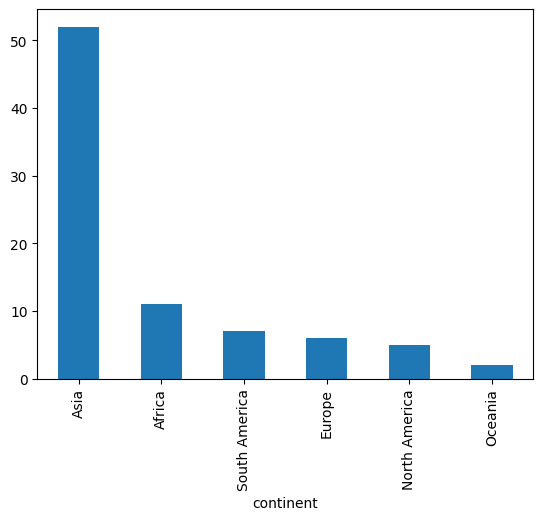

In [14]:
df_top_10.groupby('continent').size().sort_values(ascending = False).plot(kind = 'bar')

* Asia is absolutely dominating the category of megacities worldwide, representing more than 60% of cities with over 5 million residents.

### Number of top 10% cities (Megacities) by Country

<Axes: xlabel='country'>

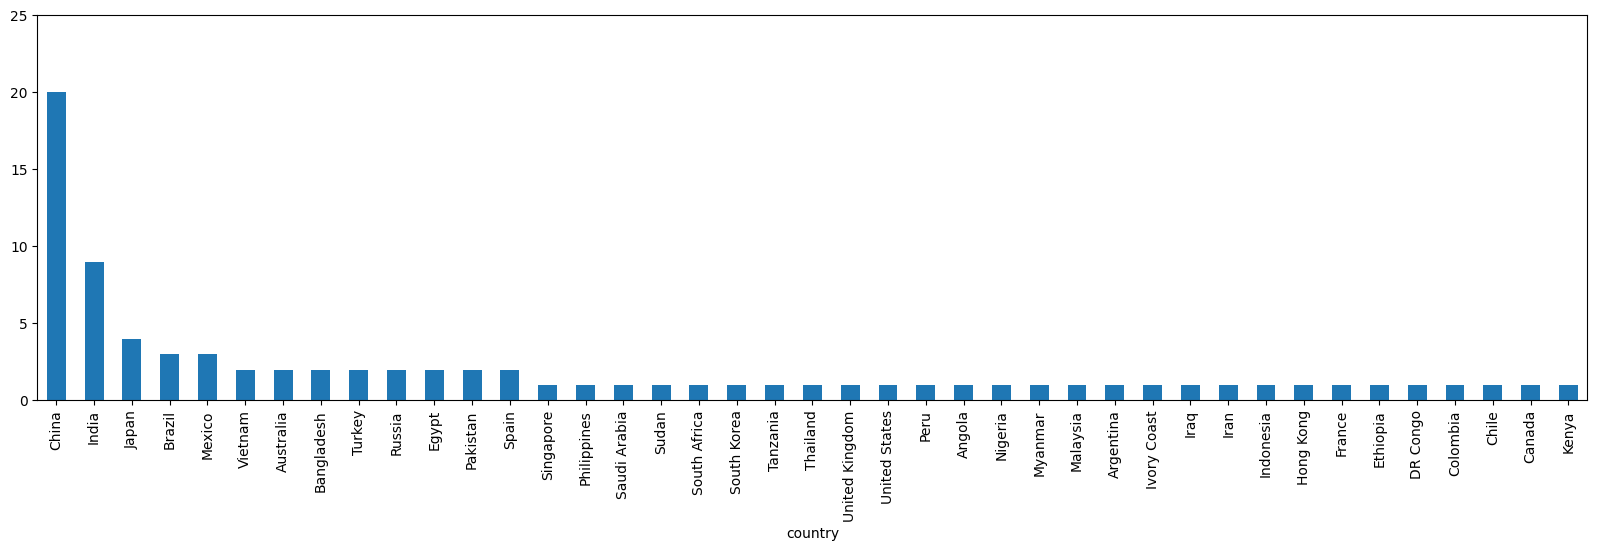

In [15]:
df_top_10.groupby('country').size().sort_values(ascending = False).plot(kind = 'bar',figsize=(20,5),ylim=(0,25))

* China alone accounts for a quarter of all these cities.
* India accounts for about 10% of these cities.

### Analyzing Countries by Continent 

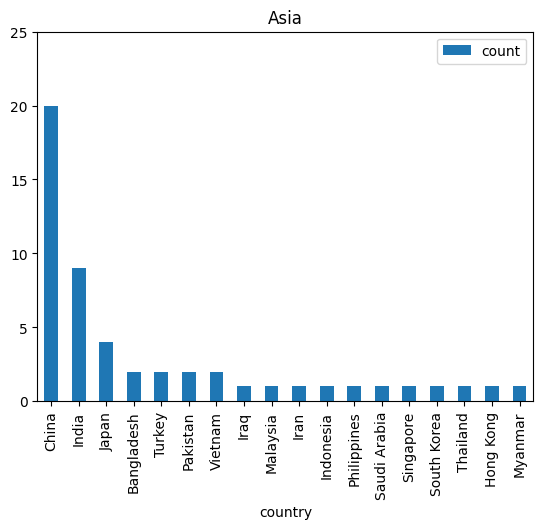

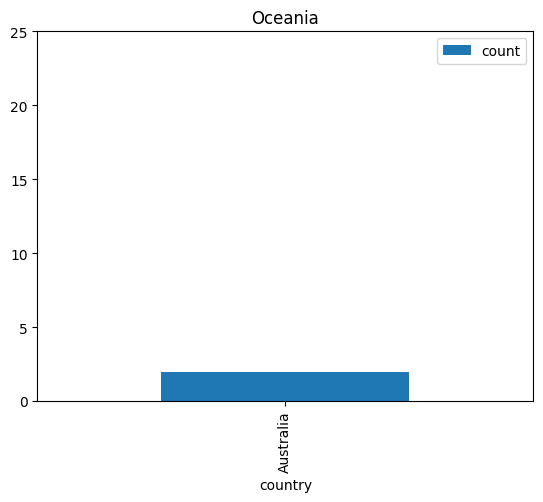

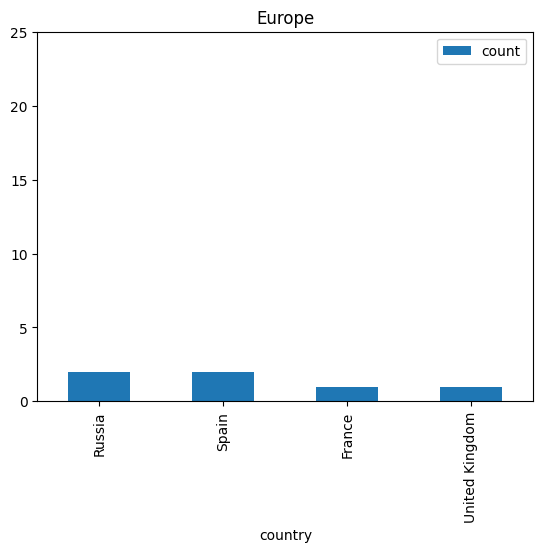

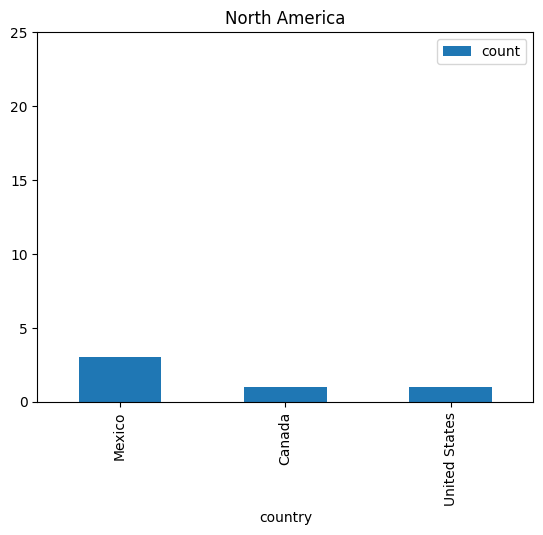

In [16]:
for c in ['Asia','Oceania', 'Europe','North America']:
    df_top_10_grp = df_top_10.loc[df_top_10.continent==c]\
    .groupby(['country']).size().reset_index()\
    .rename(columns={0:'count'}).set_index('country')\
    .sort_values(by='count', ascending = False)
    df_top_10_grp.plot(kind = 'bar',ylim=(0,25), title = c)

### Analyzing Megacities in Developed Nations

In [17]:
dev_country = ['Japan', 'Singapore', 'South Korea', 'Hong Kong', 'Australia', 'Spain', 'United Kingdom', 'France', 'United States', 'Canada']
print('dev_country defined')

dev_country defined


In [18]:
print('Cites in the developed countries:')
print(df_top_10.loc[df_top_10.country.isin(dev_country),['pop2023','city']].shape[0])
#df_top_10.loc[df_top_10.country.isin(dev_country),['pop2023','city']].set_index('city').plot(kind='bar', legend=False,ylim=(0,40000000), title = 'dev_country')

Cites in the developed countries:
15


### Megacities in Developed Nations by Contient

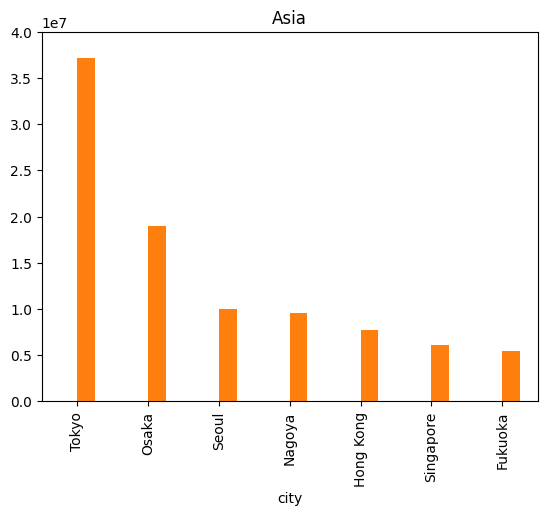

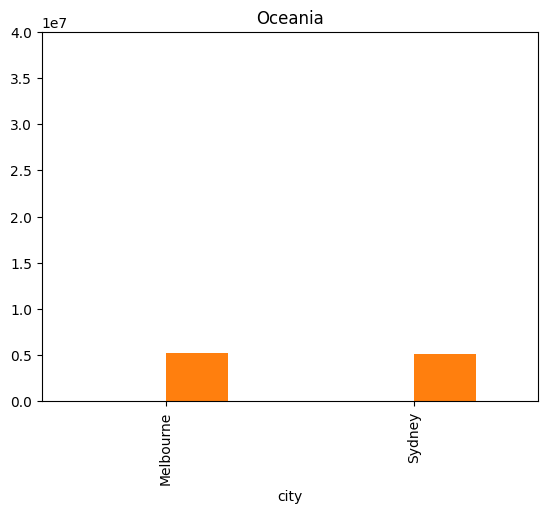

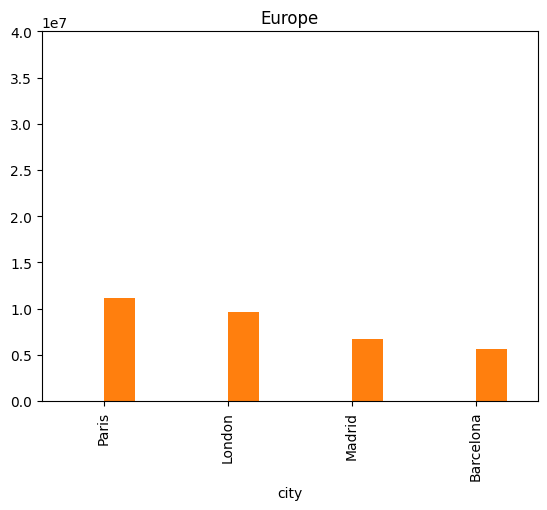

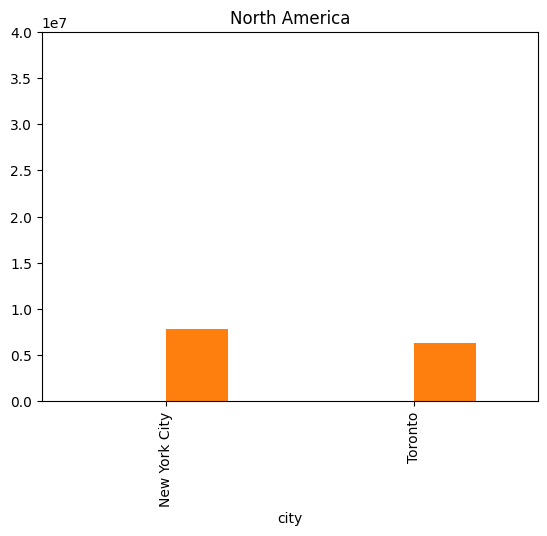

In [19]:
for c in ['Asia','Oceania', 'Europe','North America']:
    df_top_10.loc[(df_top_10.continent==c)&(df_top_10.country.isin(dev_country)),['pop2023','city']].reset_index().set_index('city').plot(kind='bar', legend=False,ylim=(0,40000000), title = c)

1. Despite boasting over 80 megacities worldwide, the options for residing in a developed nation are limited to just 15.
2. Living in Asia, which includes Oceania, offers the widest selection of developed megacities, followed by Europe, with North America providing the fewest choices.
3. Tokyo and Osaka stand out for their remarkable capacity to accommodate over 20 million residents, while the remaining 13 cities fall short of reaching the 10 million mark.